<h3 align="left">Introduction</font></h3>
    
This notebook focuses on evaluating the performance of a predictive model using the Area Under the Receiver Operating Characteristic Curve (AUC-ROC). The objective is to predict which customers respond positively to an automobile insurance offer.

<h3 align="left">Dataset Overview</font></h3>
The dataset used in this analysis is provided by an Insurance company that offers Health Insurance to its customers. The goal is to build a predictive model to determine whether the policyholders from the previous year will also be interested in the Vehicle Insurance offered by the company. The dataset includes various features related to the customers' demographic, policy, and claim history, which will be utilized to train and evaluate the model.

Credit: https://www.kaggle.com/code/satyaprakashshukl/insurance-boost-analysis

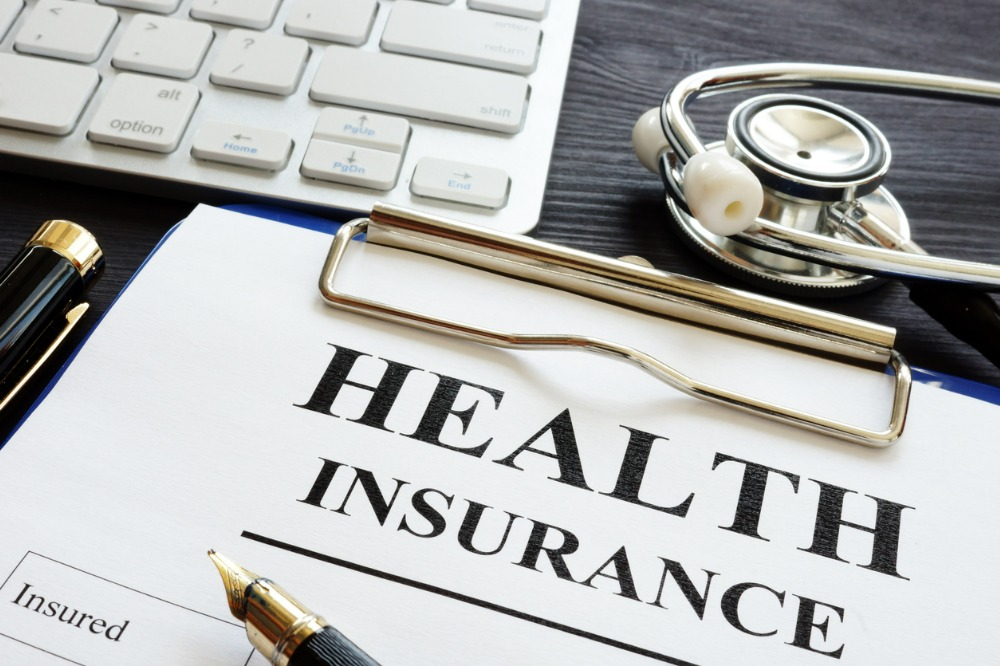

<h1 align="left">Importing libraries and Loading the Dataset:</h1>  

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [2]:
df_sub=pd.read_csv("/kaggle/input/playground-series-s4e7/sample_submission.csv")
df_train = pd.read_csv("/kaggle/input/playground-series-s4e7/train.csv")
df_test = pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv')

In [3]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


<h1 align="left">Missing Value</h1>  

In [18]:
print(f'Number of missing values in df_train:\n{df_train.isna().sum()}')

Number of missing values in df_train:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [11]:
print(f'Number of missing values in df_test:\n{df_test.isna().sum()}')

Number of missing values in df_test:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64


In [7]:
print(f'train df dataFrame size: {df_train.shape}')
print(f'test dataFrame size: {df_test.shape}')

train df dataFrame size: (11504798, 12)
test dataFrame size: (7669866, 11)


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [5]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [19]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


<h1 align="left"> Exploratory data analysis</h1>  

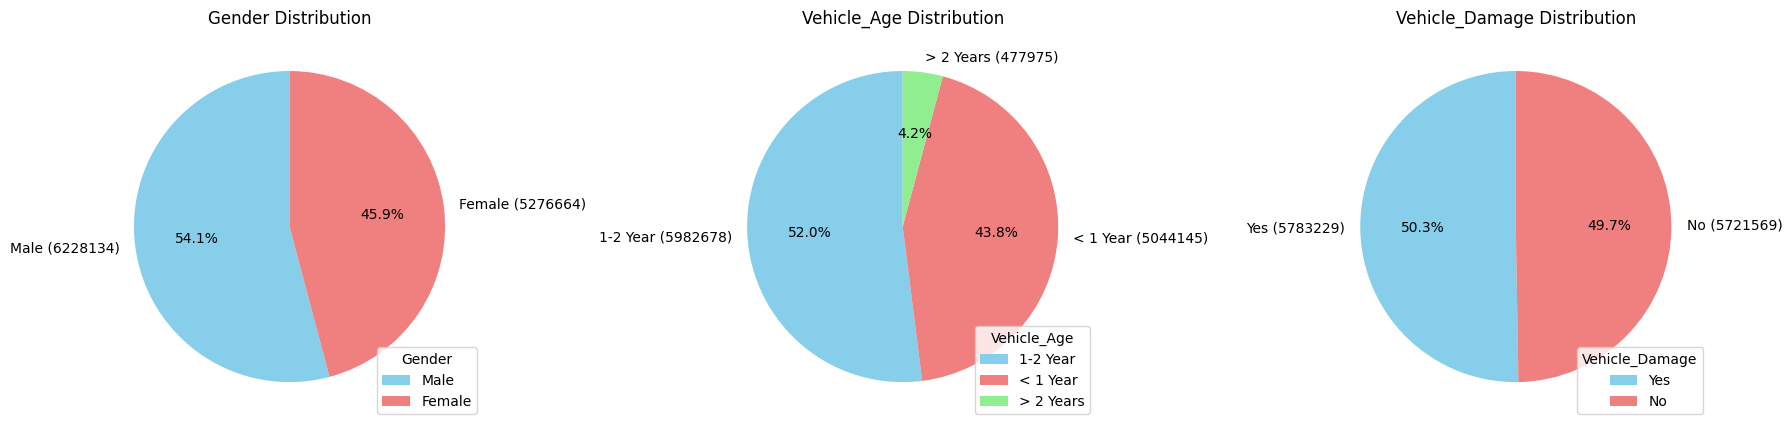

In [9]:
categorical_columns = df_train[['Gender', 'Vehicle_Age', 'Vehicle_Damage']]
num_columns = len(categorical_columns.columns)
num_rows = (num_columns + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    value_counts = df_train[column].value_counts()
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightpink'][:len(value_counts)]
    labels = [f'{index} ({count})' for index, count in zip(value_counts.index, value_counts)]

    ax = axes[i]
    wedges, texts, autotexts = ax.pie(value_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    ax.legend(wedges, value_counts.index, title=column, loc='lower right')
    ax.set_title(f'{column} Distribution')

# Hide any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In this three pie chart show the distribution of categorical data relevant to predicting interest in vehicle insurance.

Genter distribution
In this chart Male account for 54.1% in total and female show as around 45.9% in total. Male customer is slightly highter to compare with female but relatively balanced.

Vehicle age distribution 
In this pie chart show the distribution of vehicle age, majority of vehicles are between 1 to 2 years old. Suggests that most vehicles in the dataset are relatively new, which could influence analyses related to vehicle performance, maintenance, and value depreciation over time.

Vehicle Damage distribution 
In this chart the vehicles with damage is equal distribution with without damage. 

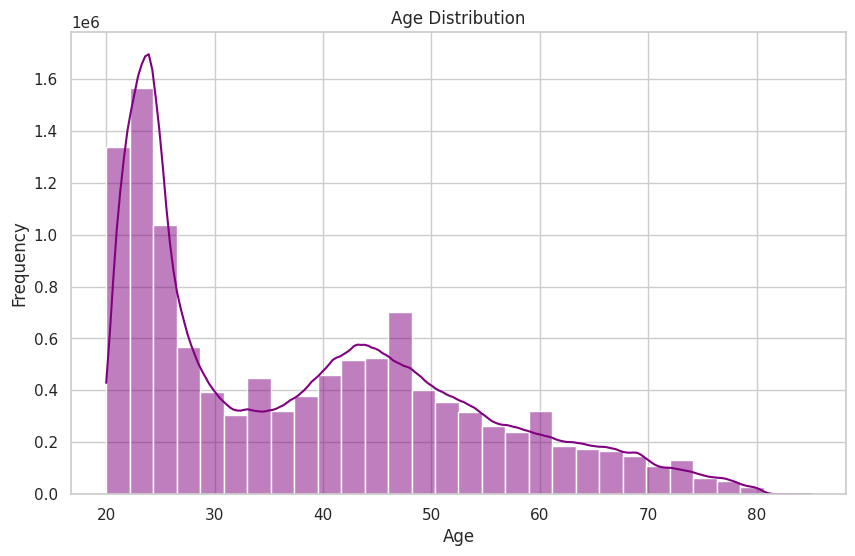

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Age'], bins=30, kde=True, color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This bar plot shows the age distribution show that mainly around 20-25 age range, show the significant portion of this age group of young adults. Another noticeable peak is around 45-50 age range. In this plot provides insight into age demographics of the population which can helpful for marketing strategies planning. 

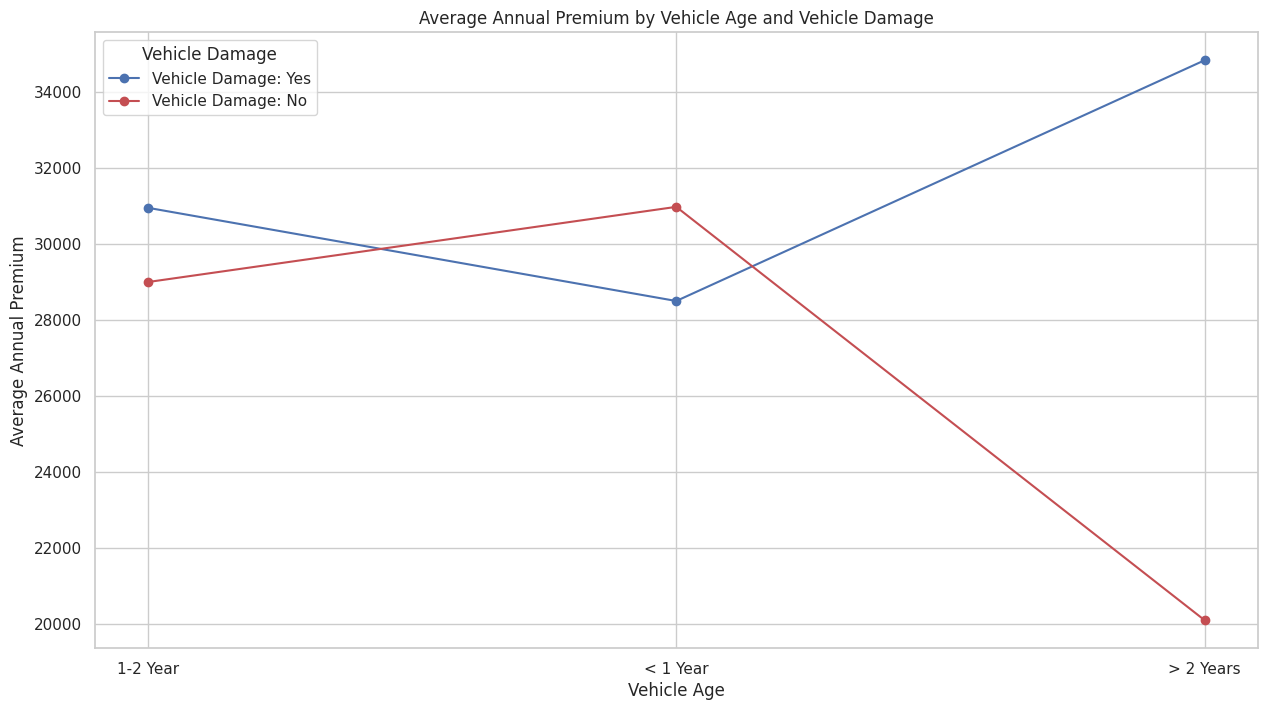

In [5]:
sns.set(style='whitegrid')

plt.figure(figsize=(15, 8))

damage_yes = df_train[df_train['Vehicle_Damage'] == 'Yes']
damage_no = df_train[df_train['Vehicle_Damage'] == 'No']

damage_yes_grouped = damage_yes.groupby('Vehicle_Age')['Annual_Premium'].mean().reset_index()
damage_no_grouped = damage_no.groupby('Vehicle_Age')['Annual_Premium'].mean().reset_index()

plt.plot(damage_yes_grouped['Vehicle_Age'], damage_yes_grouped['Annual_Premium'], marker='o', label='Vehicle Damage: Yes', color='b')
plt.plot(damage_no_grouped['Vehicle_Age'], damage_no_grouped['Annual_Premium'], marker='o', label='Vehicle Damage: No', color='r')

plt.title('Average Annual Premium by Vehicle Age and Vehicle Damage')
plt.xlabel('Vehicle Age')
plt.ylabel('Average Annual Premium')
plt.legend(title='Vehicle Damage')

plt.show()


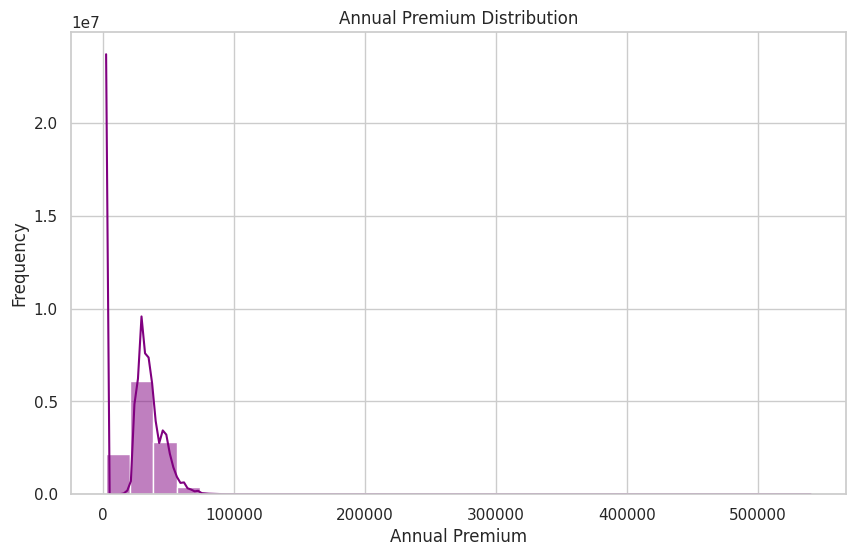

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Annual_Premium'], bins=30, kde=True, color='purple')
plt.title('Annual Premium Distribution')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.show()

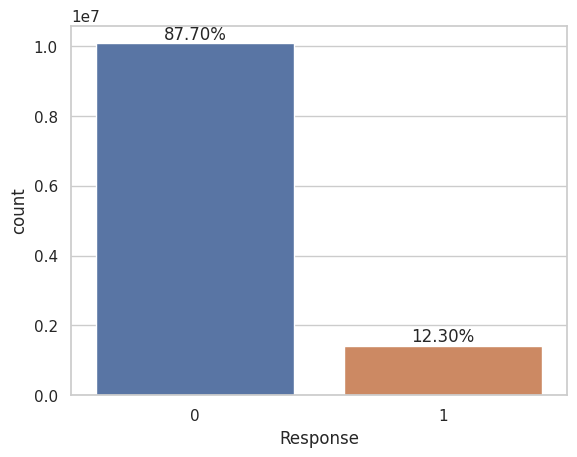

In [10]:
fig, ax = plt.subplots()
sns.countplot(x='Response', data=df_train, ax=ax)

# Calculate the total number of instances
total = len(df_train)

# Add percentages on top of the bars
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5  # Adjust the position above the bar
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

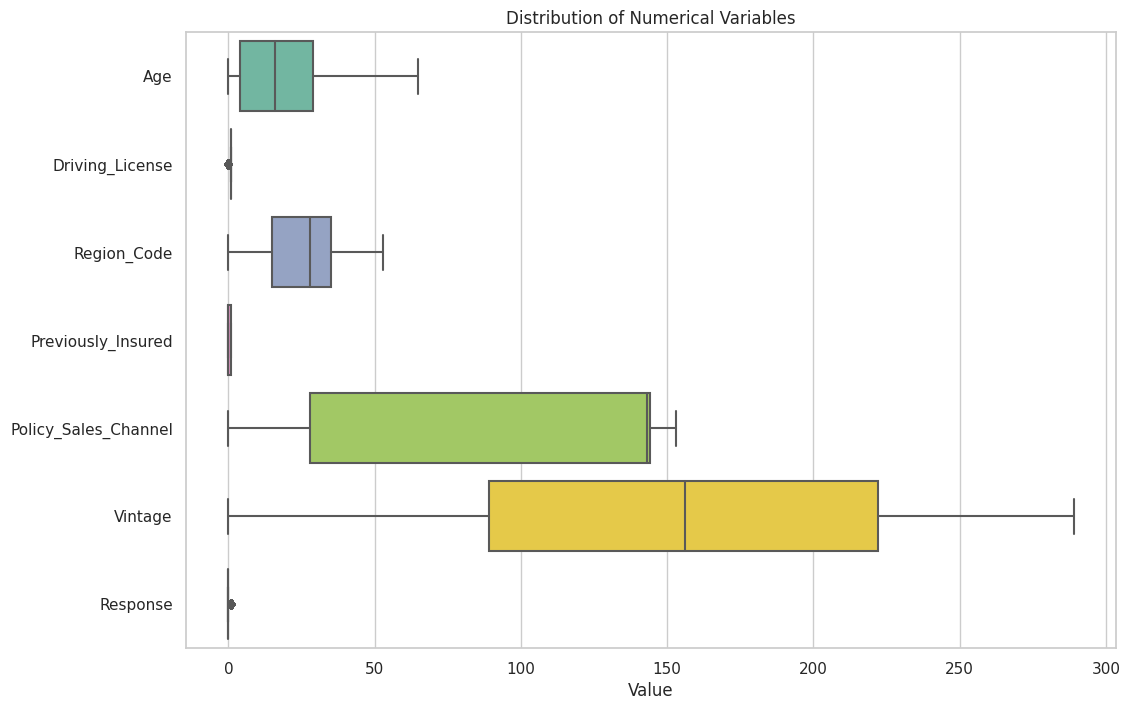

In [21]:
fig, ax = plt.subplots()
sns.countplot(x='Response', data=df_train, ax=ax)

# Calculate the total number of instances
total = len(train)

# Add percentages on top of the bars
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5  # Adjust the position above the bar
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

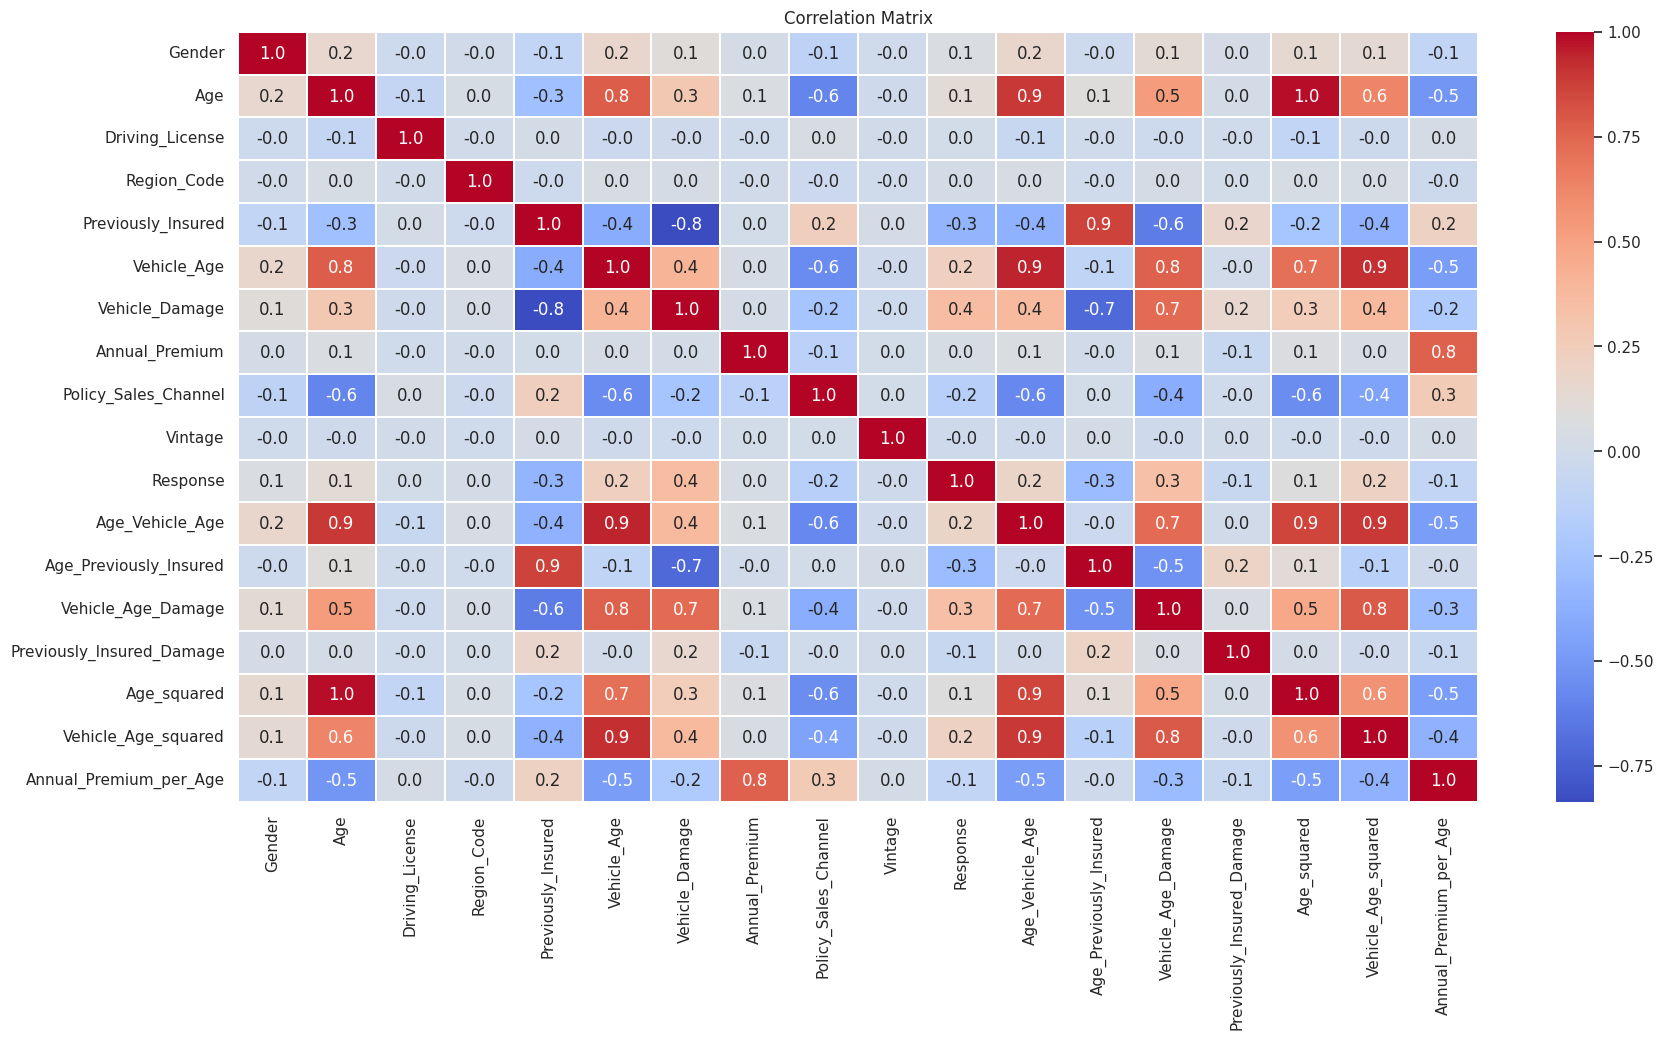

In [22]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

<h1>Data Engineering and Data Preprocessing</h1>


In [6]:
import pandas as pd
from pandas.api.types import CategoricalDtype

# Initialize Response column in df_test
df_test['Response'] = 0

# Identify columns with fewer than 10 unique values
less = [col for col in df_train.columns if df_train[col].nunique() < 10]
print('Columns with LESS than 10 unique values:', less)
print('Columns with MORE than 10 unique values:', [col for col in df_train.columns if col not in less])

# Convert identified columns to categorical type
for col in less:
    df_train[col] = df_train[col].astype('category')
    df_test[col] = df_test[col].astype('category')

# Define the new order of categories for 'Vehicle_Age'
new_categories = ['< 1 Year', '1-2 Year', '> 2 Years']
new_dtype = CategoricalDtype(categories=new_categories, ordered=True)

# Update the 'Vehicle_Age' column with the new dtype in both df_train and df_test DataFrames
df_train['Vehicle_Age'] = df_train['Vehicle_Age'].astype(new_dtype)
df_test['Vehicle_Age'] = df_test['Vehicle_Age'].astype(new_dtype

Columns with LESS than 10 unique values: ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']
Columns with MORE than 10 unique values: ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [35]:
# Combine DataFrames
full = pd.concat([df_train, df_test], axis=0)
for col in less:
    full[col] = full[col].astype('category')

# Age Binning
full['age_bins'] = pd.cut(full['Age'], bins=7)
full['Age_Type'] = full['age_bins'].cat.codes

# Interaction Features
full['Age_x_Vehicle_Age'] = full['Age_Type'] * full['Vehicle_Age'].cat.codes
full['Age_x_Vehicle_Damage'] = full['Age_Type'] * full['Vehicle_Damage'].cat.codes
full['Age_x_Previously_Insured'] = full['Age_Type'] * full['Previously_Insured'].cat.codes

# Create factorized interaction features
fac_pre = ['Policy_Sales_Channel', 'Vehicle_Damage', 'Annual_Premium', 'Vintage', 'Age_Type']
col_pre = []
for col in fac_pre:
    full['Previously_Insured_x_' + col] = pd.factorize(full['Previously_Insured'].astype(str) + full[col].astype(str))[0]
    col_pre.append('Previously_Insured_x_' + col)

fac_pro = fac_pre[1:]
col_pro = []
for col in fac_pro:
    full['Policy_Sales_Channel_x_' + col] = pd.factorize(full['Policy_Sales_Channel'].astype(str) + full[col].astype(str))[0]
    col_pro.append('Policy_Sales_Channel_x_' + col)

# Split combined DataFrame back into training and test sets
train_df = full.iloc[:len(df_train)]
test_df = full.iloc[len(df_train):]

X = train_df.drop(['Response', 'age_bins'], axis=1)
y = train_df['Response']

X.head()  # Display the head of the resulting feature matrix


Columns with LESS than 10 unique values: ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']
Columns with MORE than 10 unique values: ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,...,Age_x_Previously_Insured,Previously_Insured_x_Policy_Sales_Channel,Previously_Insured_x_Vehicle_Damage,Previously_Insured_x_Annual_Premium,Previously_Insured_x_Vintage,Previously_Insured_x_Age_Type,Policy_Sales_Channel_x_Vehicle_Damage,Policy_Sales_Channel_x_Annual_Premium,Policy_Sales_Channel_x_Vintage,Policy_Sales_Channel_x_Age_Type
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,...,0,0,0,0,0,0,0,0,0,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,...,0,1,0,1,1,1,1,1,1,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,...,0,2,1,2,2,2,2,2,2,2
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,...,0,3,0,3,3,3,3,3,3,3
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,...,1,2,1,4,4,4,2,4,4,4


<h1>Modeling</h1>

Model from :https://www.kaggle.com/code/khangtran94vn/khang-eda-classification-insurance/notebook

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 512)

coltrans = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Gender', 'Vehicle_Damage']),
        ('minmax', MinMaxScaler(), ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Policy_Sales_Channel', 'Vintage']),
        ('ordinal', OrdinalEncoder(categories=[['< 1 Year', '1-2 Year', '> 2 Years']]), ['Vehicle_Age']),
        ('robust', RobustScaler(), ['Annual_Premium']),
        ('standard', StandardScaler(), ['Age_Type', 'Age_x_Vehicle_Age', 'Age_x_Vehicle_Damage', 'Age_x_Previously_Insured']),
        ('standard_2', StandardScaler(),col_pre+col_pro),            # Version 6:
#         ('standard_3', StandardScaler(),new_stan),
#         ('minmax_2', MinMaxScaler(),new_min)                       # Version 7:
    ],
    remainder='passthrough'  # Keeps columns not specified in transformers
)

coltrans

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(),
                                 ['Gender', 'Vehicle_Damage']),
                                ('minmax', MinMaxScaler(),
                                 ['Age', 'Driving_License', 'Region_Code',
                                  'Previously_Insured', 'Policy_Sales_Channel',
                                  'Vintage']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['< 1 Year',
                                                             '1-2 Year',
                                                             '> 2 Years']]),
                                 ['Vehicle_Age']),
                                ('robust', RobustScaler(), ['Annual_...
                                ('standard_2', StandardScaler(),
                                 ['Previously_Insured_x_Policy_Sales_Channel',
                                  'Previously_Insured_x_Vehicle_Damage',
                                  'Previously_Insured_x_Annual_Premium',
                                  'Previously_Insured_x_Vintage',
                                  'Previously_Insured_x_Age_Type',
                                  'Policy_Sales_Channel_x_Vehicle_Damage',
                                  'Policy_Sales_Channel_x_Annual_Premium',
                                  'Policy_Sales_Channel_x_Vintage',
                                  'Policy_Sales_Channel_x_Age_Type'])])

In [14]:
X_train_trans = coltrans.fit_transform(X_train)
X_test_trans = coltrans.transform(X_test)

ratio = len(df_train[df_train['Response']==0]) / len(df_train[df_train['Response']==1])
ratio

pd.DataFrame(X_train_trans,columns=coltrans.get_feature_names_out())

,cat__Gender_Female,cat__Gender_Male,cat__Vehicle_Damage_No,cat__Vehicle_Damage_Yes,minmax__Age,minmax__Driving_License,minmax__Region_Code,minmax__Previously_Insured,minmax__Policy_Sales_Channel,minmax__Vintage,...,standard__Age_x_Previously_Insured,standard_2__Previously_Insured_x_Policy_Sales_Channel,standard_2__Previously_Insured_x_Vehicle_Damage,standard_2__Previously_Insured_x_Annual_Premium,standard_2__Previously_Insured_x_Vintage,standard_2__Previously_Insured_x_Age_Type,standard_2__Policy_Sales_Channel_x_Vehicle_Damage,standard_2__Policy_Sales_Channel_x_Annual_Premium,standard_2__Policy_Sales_Channel_x_Vintage,standard_2__Policy_Sales_Channel_x_Age_Type
0,1.0,0.0,0.0,1.0,0.353846,1.0,0.538462,0.0,0.154321,0.363322,...,-0.414247,-0.432120,-0.892909,-0.411167,-0.540301,-0.802372,-0.425781,0.054069,-0.493784,-0.451111
1,1.0,0.0,1.0,0.0,0.076923,1.0,0.153846,1.0,0.932099,0.878893,...,-0.414247,-0.380437,0.526480,0.477098,-1.488719,-0.523165,-0.373957,-0.238491,-0.541267,-0.432163
2,0.0,1.0,1.0,0.0,0.569231,1.0,0.250000,1.0,0.154321,0.716263,...,2.158594,0.343123,0.526480,-0.928375,0.204884,2.268902,0.040629,-0.656232,-0.545848,-0.204781
3,1.0,0.0,0.0,1.0,0.307692,1.0,0.153846,0.0,0.759259,0.256055,...,-0.414247,-0.483803,-0.892909,-0.333583,0.777630,-0.802372,-0.477604,-0.161605,-0.375077,-0.223729
4,0.0,1.0,0.0,1.0,0.384615,1.0,0.269231,0.0,0.154321,0.491349,...,-0.414247,-0.432120,-0.892909,0.131031,-1.476402,-0.802372,-0.425781,-0.358861,-0.566258,-0.451111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8628593,0.0,1.0,1.0,0.0,0.061538,1.0,0.942308,0.0,0.925926,0.217993,...,-0.414247,0.859953,1.945869,-0.890918,1.430437,-1.081579,1.750797,0.102796,0.215959,0.268931
8628594,1.0,0.0,0.0,1.0,0.061538,1.0,0.288462,1.0,0.932099,0.363322,...,-0.414247,-0.380437,3.365258,-0.928375,0.377324,-0.523165,-0.270311,-0.656206,-0.403817,-0.432163
8628595,0.0,1.0,0.0,1.0,0.307692,1.0,0.538462,0.0,0.074074,0.626298,...,-0.414247,2.048660,-0.892909,-0.351114,0.352689,-0.802372,2.113560,5.148157,0.866556,0.780541
8628596,0.0,1.0,1.0,0.0,0.092308,1.0,0.346154,1.0,0.932099,0.640138,...,-0.414247,-0.380437,0.526480,0.155018,-0.534143,-0.523165,-0.373957,-0.205285,-0.493367,-0.432163


<h1>XGBoost</h1>

In [15]:
import xgboost as xgb

#### From optuna

xgbc = xgb.XGBClassifier(
    random_state=512,
    objective="binary:logistic",
    eval_metric='auc',
    max_depth=8,
    min_child_weight=12,  # Equivalent to min_samples_leaf
    use_label_encoder=False, n_estimators = 2155,
    colsample_bytree = 0.5, gamma = 0.2, 
    learning_rate = 0.09093568107192034, subsample = 1.0,
    reg_alpha = 0.0011852827097616767, 
    reg_lambda = 1.0735757602378362e-06,
    early_stopping_rounds=10,
    max_bin = 197818,
    scale_pos_weight = ratio,
)

In [16]:
xgbc.fit(X_train_trans,y_train, 
         eval_set=[(X_test_trans, y_test)],  # Validation set
         verbose=50  # Print messages during training
)
y_pred_xgb = xgbc.predict_proba(X_test_trans)

print('ROC_AUC_Score XGBoost train: ',round(roc_auc_score(y_train,xgbc.predict_proba(X_train_trans)[:,1]) * 100,2))
print('ROC_AUC_Score XGBoost test: ',round(roc_auc_score(y_test,xgbc.predict_proba(X_test_trans)[:,1]) * 100,2))

[0]	validation_0-auc:0.84943
[50]	validation_0-auc:0.87141
[100]	validation_0-auc:0.87671
[150]	validation_0-auc:0.87956
[200]	validation_0-auc:0.88103
[250]	validation_0-auc:0.88207
[300]	validation_0-auc:0.88297
[350]	validation_0-auc:0.88396
[400]	validation_0-auc:0.88440
[450]	validation_0-auc:0.88493
[500]	validation_0-auc:0.88544
[550]	validation_0-auc:0.88584
[600]	validation_0-auc:0.88619
[650]	validation_0-auc:0.88653
[700]	validation_0-auc:0.88681
[750]	validation_0-auc:0.88706
[800]	validation_0-auc:0.88729
[850]	validation_0-auc:0.88760
[900]	validation_0-auc:0.88783
[950]	validation_0-auc:0.88796
[1000]	validation_0-auc:0.88805
[1050]	validation_0-auc:0.88820
[1100]	validation_0-auc:0.88837
[1136]	validation_0-auc:0.88846
ROC_AUC_Score XGBoost train:  89.74
ROC_AUC_Score XGBoost test:  88.85


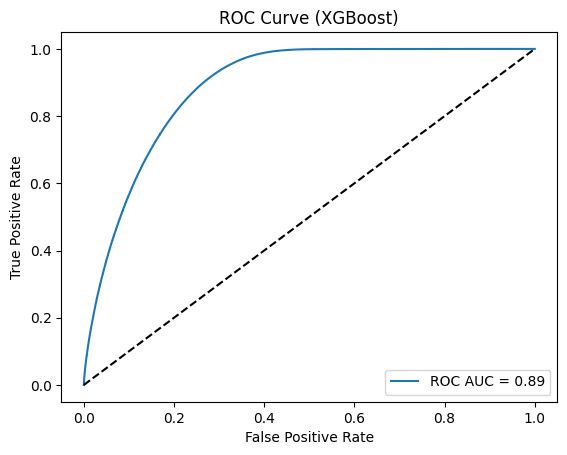

In [20]:
roc_auc_test_xgb = roc_auc_score(y_test, xgbc.predict_proba(X_test_trans)[:,1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb[:,1])

plt.plot(fpr_xgb, tpr_xgb, label=f'ROC AUC = {roc_auc_test_xgb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend(loc="lower right")

plt.show()

<h1>Catboost</h1>

In [21]:
from catboost import CatBoostClassifier

#### Initialize the CatBoost classifier
cbc = CatBoostClassifier(random_state=512,
    objective="Logloss",  # Equivalent to "binary:logistic" in XGBoost
    eval_metric='AUC',  # Equivalent to 'auc' in XGBoost
    depth=8,  # Equivalent to max_depth
    min_data_in_leaf=13,  # Equivalent to min_child_weight
    learning_rate=0.2973547288176656,  # Equivalent to learning_rate
    n_estimators=914,  # Number of boosting rounds
    l2_leaf_reg=4.5257568564763595,  # Equivalent to reg_lambda
    bagging_temperature=0.0022240625943131627,  # Controls the amount of randomization in CatBoost (similar to colsample_bytree)
    early_stopping_rounds=10,  # Similar to early_stopping_rounds in XGBoost
    scale_pos_weight = ratio,
    silent=True
)

In [22]:
cbc.fit(X_train_trans,y_train, verbose = 50)
y_pred_cbc = cbc.predict_proba(X_test_trans)

print('ROC_AUC_Score cbc train: ',round(roc_auc_score(y_train,cbc.predict_proba(X_train_trans)[:,1]) * 100,2))
print('ROC_AUC_Score cbc test: ',round(roc_auc_score(y_test,cbc.predict_proba(X_test_trans)[:,1]) * 100,2))

0:	total: 2.27s	remaining: 34m 31s
50:	total: 1m 21s	remaining: 23m 7s
100:	total: 2m 42s	remaining: 21m 47s
150:	total: 4m 2s	remaining: 20m 26s
200:	total: 5m 22s	remaining: 19m 2s
250:	total: 6m 42s	remaining: 17m 42s
300:	total: 8m 5s	remaining: 16m 28s
350:	total: 9m 28s	remaining: 15m 11s
400:	total: 10m 48s	remaining: 13m 49s
450:	total: 12m 10s	remaining: 12m 29s
500:	total: 13m 31s	remaining: 11m 8s
550:	total: 14m 51s	remaining: 9m 47s
600:	total: 16m 13s	remaining: 8m 27s
650:	total: 17m 34s	remaining: 7m 6s
700:	total: 18m 56s	remaining: 5m 45s
750:	total: 20m 20s	remaining: 4m 24s
800:	total: 21m 40s	remaining: 3m 3s
850:	total: 23m 2s	remaining: 1m 42s
900:	total: 24m 23s	remaining: 21.1s
913:	total: 24m 44s	remaining: 0us
ROC_AUC_Score cbc train:  88.88
ROC_AUC_Score cbc test:  88.37


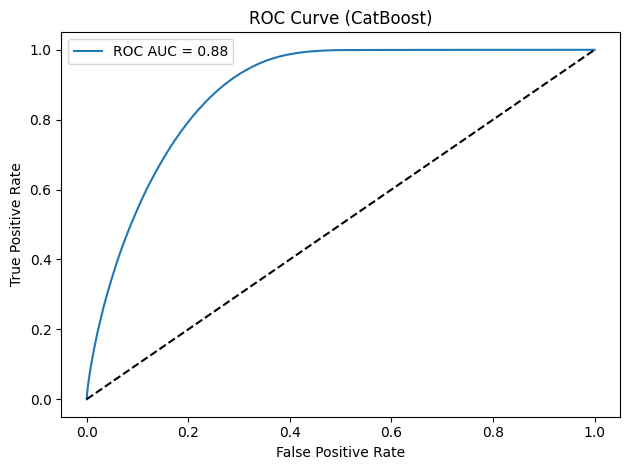

In [26]:
# Plot ROC curve
roc_auc_test_cbc = roc_auc_score(y_test, y_pred_cbc[:, 1])
fpr_cbc, tpr_cbc, _ = roc_curve(y_test, y_pred_cbc[:, 1])


plt.plot(fpr_cbc, tpr_cbc, label=f'ROC AUC = {roc_auc_test_cbc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (CatBoost)')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

<h1> Compare two model</1>

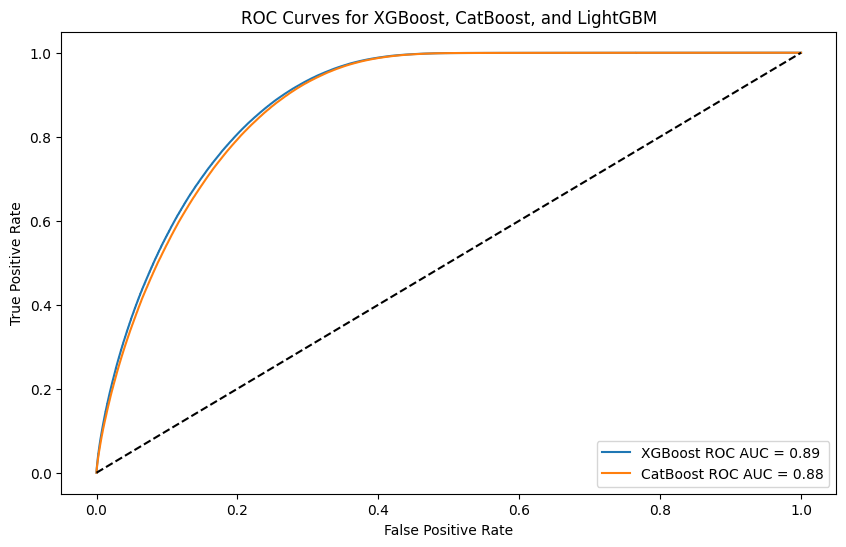

In [27]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost ROC AUC = {roc_auc_test_xgb:.2f}')
plt.plot(fpr_cbc, tpr_cbc, label=f'CatBoost ROC AUC = {roc_auc_test_cbc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for XGBoost, CatBoost, and LightGBM')
plt.legend(loc='best')
plt.show()

Submit

In [36]:
test_df = test_df.drop(['age_bins','Response'],axis=1)            
test_df
test_trans = coltrans.transform(test_df)
pd.DataFrame(test_trans, columns = coltrans.get_feature_names_out())

,cat__Gender_Female,cat__Gender_Male,cat__Vehicle_Damage_No,cat__Vehicle_Damage_Yes,minmax__Age,minmax__Driving_License,minmax__Region_Code,minmax__Previously_Insured,minmax__Policy_Sales_Channel,minmax__Vintage,...,standard__Age_x_Previously_Insured,standard_2__Previously_Insured_x_Policy_Sales_Channel,standard_2__Previously_Insured_x_Vehicle_Damage,standard_2__Previously_Insured_x_Annual_Premium,standard_2__Previously_Insured_x_Vintage,standard_2__Previously_Insured_x_Age_Type,standard_2__Policy_Sales_Channel_x_Vehicle_Damage,standard_2__Policy_Sales_Channel_x_Annual_Premium,standard_2__Policy_Sales_Channel_x_Vintage,standard_2__Policy_Sales_Channel_x_Age_Type
0,1.0,0.0,1.0,0.0,0.000000,1.0,0.903846,0.0,0.981481,0.754325,...,-0.414247,-0.070340,1.945869,-0.929209,-1.285487,-1.081579,-0.218488,-0.655668,-0.182647,-0.318472
1,0.0,1.0,0.0,1.0,0.415385,1.0,0.538462,0.0,0.759259,0.391003,...,-0.414247,-0.483803,-0.892909,-0.861977,-0.207739,-0.802372,-0.477604,-0.351742,-0.180564,-0.223729
2,0.0,1.0,0.0,1.0,0.415385,1.0,0.826923,0.0,0.154321,0.903114,...,-0.414247,-0.432120,-0.892909,-0.929209,0.789947,-0.802372,-0.425781,-0.656232,-0.327178,-0.451111
3,1.0,0.0,1.0,0.0,0.030769,1.0,0.903846,1.0,0.932099,0.363322,...,-0.414247,-0.380437,0.526480,-0.534110,0.377324,-0.523165,-0.373957,-0.556523,-0.403817,-0.432163
4,0.0,1.0,1.0,0.0,0.476923,1.0,0.365385,0.0,0.759259,0.477509,...,-0.414247,-0.483803,1.945869,-0.103725,0.931594,1.152075,0.247922,-0.025347,-0.244291,-0.166884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7669861,0.0,1.0,0.0,1.0,0.569231,1.0,0.538462,0.0,0.759259,0.342561,...,-0.414247,-0.483803,-0.892909,-0.457639,1.565925,1.152075,-0.477604,0.078269,-0.164320,-0.166884
7669862,0.0,1.0,1.0,0.0,0.123077,1.0,0.961538,1.0,0.932099,0.602076,...,-0.414247,-0.380437,0.526480,0.637442,1.227204,-0.523165,-0.373957,-0.178333,-0.260535,-0.432163
7669863,0.0,1.0,1.0,0.0,0.415385,1.0,0.634615,1.0,0.845679,0.183391,...,1.300980,7.010220,0.526480,-0.928375,-0.915973,0.872868,7.140417,-0.499301,10.555128,5.233437
7669864,0.0,1.0,0.0,1.0,0.153846,1.0,0.538462,0.0,0.759259,0.377163,...,-0.414247,-0.483803,-0.892909,-0.606240,-0.103044,-0.243959,-0.477604,-0.575728,-0.175982,-0.091090


<h1> Submission </h1>

In [38]:
final_predictions = xgbc.predict_proba(test_trans)[:, 1]

submit = pd.DataFrame({
    'id': df_test.index,
    'Response': final_predictions
})
submit.to_csv('submission.csv',index=False)
print('DONE')
submit

DONE


,id,Response
0,0,0.040635
1,1,0.871455
2,2,0.685665
3,3,0.000582
4,4,0.419792
...,...,...
7669861,7669861,0.625036
7669862,7669862,0.001159
7669863,7669863,0.001304
7669864,7669864,0.913449


<h1> Further improve</h1>

* Model Tuning 
* Memory Optimization
* Scale data 